<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Clustering and geospatial analysis
© ExploreAI Academy

In this train, we'll use geopandas to plot geospatial data and create multidimensional plots by adjusting size and colour.

## Learning objectives

By the end of this train, you should be able to;
- Create multidimensional plots by adjusting size and colour;
- Use geopandas to plot geospatial data.

## Exercises

### Exercise 1: Basic geospatial plotting

Plot the world map using `geopandas`, colouring the countries based on their GDP per capita.

**Hint**: Use the 'plot' method with the 'column' parameter set to 'gdp_md_est'


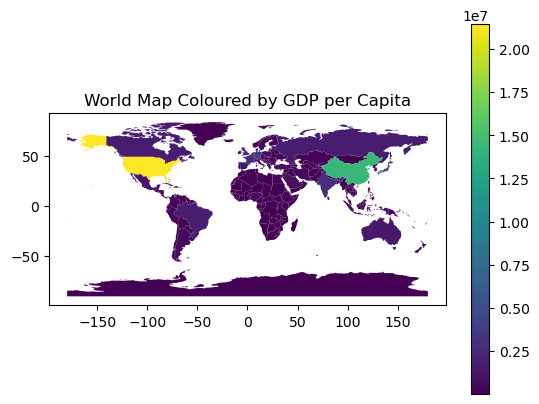

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load example geospatial dataset
world = gpd.read_file('/vsicurl/https://github.com/Explore-AI/Public-Data/raw/master/naturalearth_lowres/ne_110m_admin_0_countries.shp')

# insert code here

# Load example geospatial dataset
world = gpd.read_file('/vsicurl/https://github.com/Explore-AI/Public-Data/raw/master/naturalearth_lowres/ne_110m_admin_0_countries.shp')

# Plot the world map, colouring the countries based on their GDP per capita.
world.plot(column='GDP_MD', legend=True)
plt.title("World Map Coloured by GDP per Capita")
plt.show()

**Explanation of the output**:

- The world map is coloured based on GDP per capita, with a colour scale ranging from purple (lower GDP) to yellow (higher GDP).
- The legend on the right side of the plot shows the range of GDP values.
- Countries with higher GDP per capita, like the United States and China, are shown in lighter colours, while countries with lower GDP per capita are shown in darker colours.

**Explanation of the output**:

- The world map is coloured based on GDP per capita, with a colour scale ranging from purple (lower GDP) to yellow (higher GDP).
- The legend on the right side of the plot shows the range of GDP values.
- Countries with higher GDP per capita, like the United States and China, are shown in lighter colours, while countries with lower GDP per capita are shown in darker colours.

### Exercise 2: Adjusting size and colour in geospatial plots

Create a plot where the size of each country is determined by its population and the colour is determined by its GDP per capita.

**Hint**: 
1. Use the geometries of countries from the `geopandas` dataframe for the map.
2. Overlay a scatter plot to adjust the size of the countries based on their population.


In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load example geospatial dataset
world = gpd.read_file('/vsicurl/https://github.com/Explore-AI/Public-Data/raw/master/naturalearth_lowres/ne_110m_admin_0_countries.shp')
world.columns.tolist()

['featurecla',
 'scalerank',
 'LABELRANK',
 'SOVEREIGNT',
 'SOV_A3',
 'ADM0_DIF',
 'LEVEL',
 'TYPE',
 'TLC',
 'ADMIN',
 'ADM0_A3',
 'GEOU_DIF',
 'GEOUNIT',
 'GU_A3',
 'SU_DIF',
 'SUBUNIT',
 'SU_A3',
 'BRK_DIFF',
 'NAME',
 'NAME_LONG',
 'BRK_A3',
 'BRK_NAME',
 'BRK_GROUP',
 'ABBREV',
 'POSTAL',
 'FORMAL_EN',
 'FORMAL_FR',
 'NAME_CIAWF',
 'NOTE_ADM0',
 'NOTE_BRK',
 'NAME_SORT',
 'NAME_ALT',
 'MAPCOLOR7',
 'MAPCOLOR8',
 'MAPCOLOR9',
 'MAPCOLOR13',
 'POP_EST',
 'POP_RANK',
 'POP_YEAR',
 'GDP_MD',
 'GDP_YEAR',
 'ECONOMY',
 'INCOME_GRP',
 'FIPS_10',
 'ISO_A2',
 'ISO_A2_EH',
 'ISO_A3',
 'ISO_A3_EH',
 'ISO_N3',
 'ISO_N3_EH',
 'UN_A3',
 'WB_A2',
 'WB_A3',
 'WOE_ID',
 'WOE_ID_EH',
 'WOE_NOTE',
 'ADM0_ISO',
 'ADM0_DIFF',
 'ADM0_TLC',
 'ADM0_A3_US',
 'ADM0_A3_FR',
 'ADM0_A3_RU',
 'ADM0_A3_ES',
 'ADM0_A3_CN',
 'ADM0_A3_TW',
 'ADM0_A3_IN',
 'ADM0_A3_NP',
 'ADM0_A3_PK',
 'ADM0_A3_DE',
 'ADM0_A3_GB',
 'ADM0_A3_BR',
 'ADM0_A3_IL',
 'ADM0_A3_PS',
 'ADM0_A3_SA',
 'ADM0_A3_EG',
 'ADM0_A3_MA',
 'ADM0_A3_PT

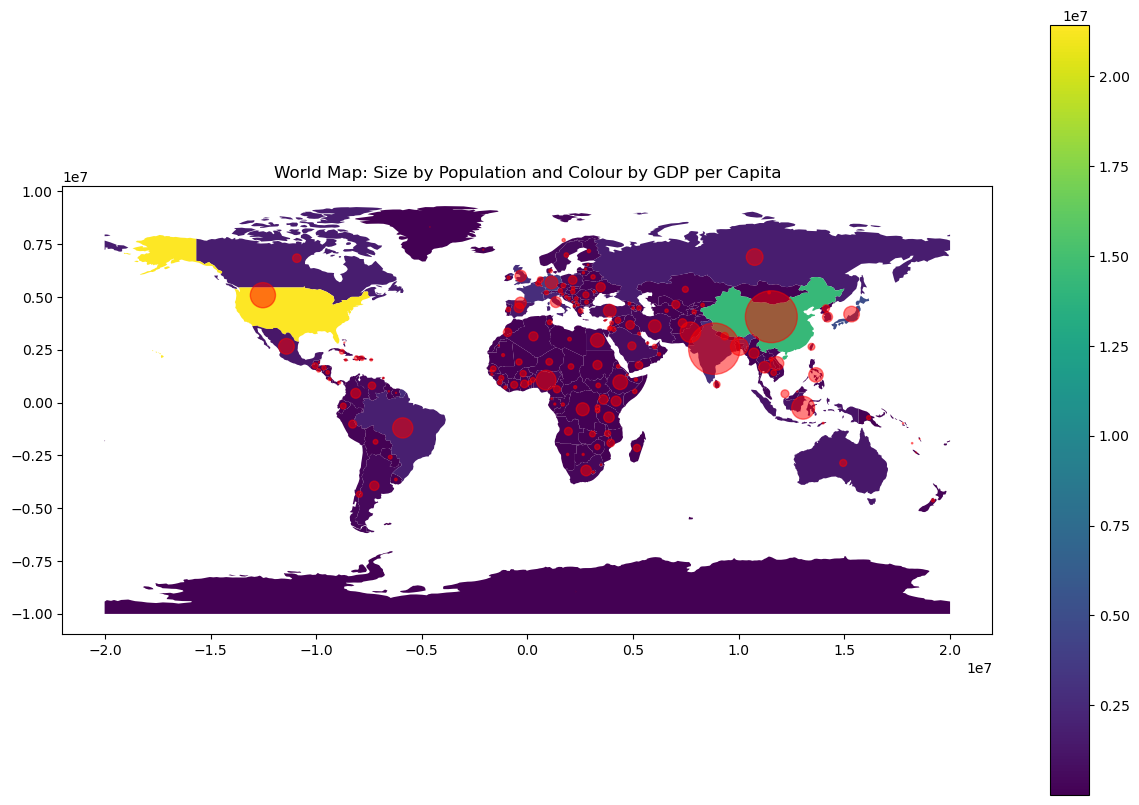

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load example geospatial dataset
world = gpd.read_file('/vsicurl/https://github.com/Explore-AI/Public-Data/raw/master/naturalearth_lowres/ne_110m_admin_0_countries.shp')
# Reproject geometries to a projected CRS
world = world.to_crs('EPSG:3786')

# Calculate the centre of each country for the scatter plot
world['centroid'] = world.geometry.centroid
world['centroid_lon'] = world.centroid.x
world['centroid_lat'] = world.centroid.y

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map colouring countries by GDP per capita
world.plot(column='GDP_MD', ax=ax, legend=True, cmap='viridis')

# Overlay a scatter plot where the size of each point is proportional to the population
plt.scatter(
    world['centroid_lon'], 
    world['centroid_lat'], 
    s=world['POP_EST'] / 1e6,  # Size of markers
    color='red', 
    alpha=0.5
)

plt.title("World Map: Size by Population and Colour by GDP per Capita")
plt.show()


### Exercise 3: Geospatial clustering analysis

Use K-means clustering to group countries based on their GDP and population, then plot the clusters on the map with different colours.

**Hint**: Use `KMeans` from `sklearn.cluster` and the `plot` method from geopandas

F:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


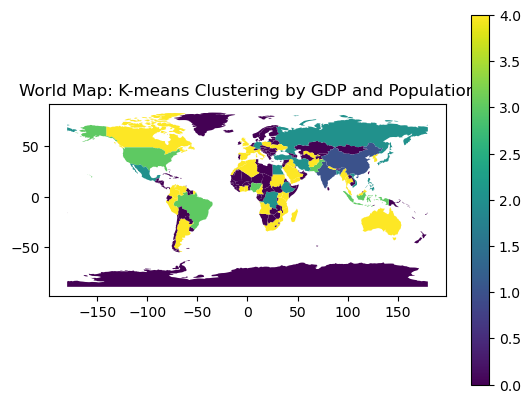

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load example geospatial dataset
world = gpd.read_file('/vsicurl/https://github.com/Explore-AI/Public-Data/raw/master/naturalearth_lowres/ne_110m_admin_0_countries.shp')

# Prepare data for clustering
data = world[['GDP_MD', 'POP_EST']].dropna()
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(data)

# Add cluster labels to the geodataframe
world['cluster'] = kmeans.labels_

# Perform K-means clustering and plot the clusters
world.plot(column='cluster', legend=True, cmap='viridis')
plt.title("World Map: K-means Clustering by GDP and Population")
plt.show()

### Exercise 4: Advanced multidimensional geospatial plot

Create a multidimensional plot with countries sized by their population, coloured by their GDP per capita, and apply a different marker for each continent.

**Hint**: Use 'plot' method with various parameters and consider using 'continent' for markers

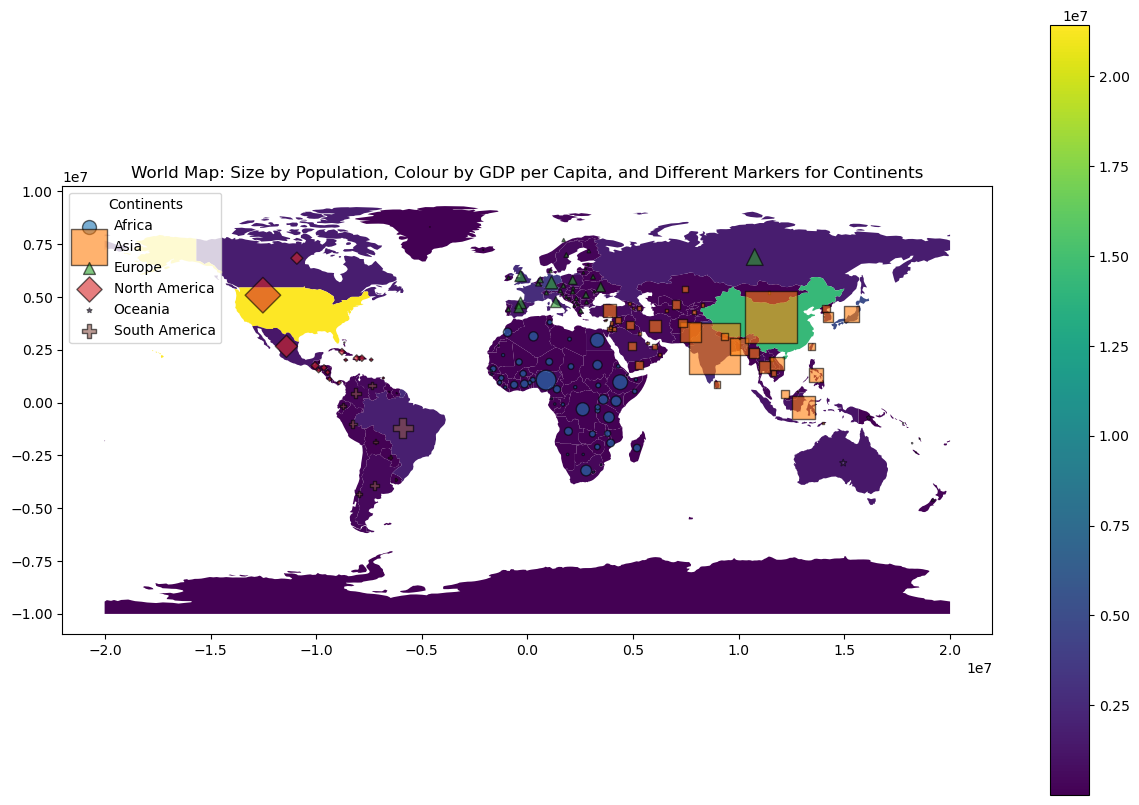

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load example geospatial dataset
world = gpd.read_file('/vsicurl/https://github.com/Explore-AI/Public-Data/raw/master/naturalearth_lowres/ne_110m_admin_0_countries.shp')

# Reproject geometries to a projected CRS
world = world.to_crs('EPSG:3786')

# Calculate the centre of each country for the scatter plot
world['centroid'] = world.geometry.centroid
world['centroid_lon'] = world.centroid.x
world['centroid_lat'] = world.centroid.y

# Marker shapes for continents
marker_shapes = {'Africa': 'o', 'Asia': 's', 'Europe': '^', 'North America': 'D', 'Oceania': '*', 'South America': 'P'}

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map colouring countries by GDP per capita
world.plot(column='GDP_MD', ax=ax, legend=True, cmap='viridis')

# Overlay a scatter plot where the size of each point is proportional to the population and marker shapes for continents
for continent, marker in marker_shapes.items():
    subset = world[world['CONTINENT'] == continent]
    plt.scatter(
        subset['centroid_lon'],
        subset['centroid_lat'],
        s=subset['POP_EST'] / 1e6,
        marker=marker,
        label=continent,
        alpha=0.6,
        edgecolors='k'
    )

plt.legend(title="Continents")
plt.title("World Map: Size by Population, Colour by GDP per Capita, and Different Markers for Continents")
plt.show()


### Exercise 1: Basic geospatial plotting

The code below produces a world map where countries are coloured based on their GDP per capita.

This solution uses the `plot` method of `geopandas` to create a map of the world, with countries coloured based on their GDP per capita. The `column` parameter specifies which data column to use for colouring, and `legend=True` adds a legend to the plot.

### Exercise 2: Adjusting size and colour in geospatial plots

In this solution, the `plot` method is used to create a map where the `markersize` parameter is adjusted based on the population of each country, scaled down by a factor to ensure the markers are an appropriate size. The `column` parameter is used to colour the countries by their GDP per capita, and a legend is included for clarity.


**Explanation of output**:

- The countries are coloured based on their GDP per capita, with a colour scale ranging from purple (lower GDP) to yellow (higher GDP). The legend on the right side of the plot shows the range of GDP values.
- The size of each country on the map is determined by its population. Countries with larger populations have larger markers, while countries with smaller populations have smaller markers.

### Exercise 3: Geospatial clustering analysis

This solution involves using the `KMeans` algorithm from `sklearn.cluster` to perform clustering on countries based on their GDP and population. The `fit` method is used to compute the clusters, which are then added as a new column to the `world` geodataframe. The clusters are visualised on the map using the `plot` method, with different colours representing different clusters.

This visualisation helps in understanding how countries are grouped based on their economic (GDP) and demographic (population) characteristics. The clusters reveal patterns and similarities among countries that may not be immediately apparent from the raw data.

### Exercise 4: Advanced multidimensional geospatial plot

This solution creates a complex plot where countries are represented with different marker shapes based on their continent, sized by population, and coloured by GDP per capita. The unique continents are extracted, and each subset of countries belonging to a continent is plotted separately with a different marker. The legend helps in identifying the continents.

**Explanation of output**: 

- **Size**: The size of each marker represents the population of the country. Larger markers correspond to countries with larger populations.
- **Marker Shapes**: Different marker shapes are used to represent different continents. This allows for easy identification of countries belonging to specific continents:
    - Circles: Africa
    - Squares: Asia
    - Triangles: Europe
    - Diamonds: North America
    - Stars: Oceania
    - Plus signs: South America

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>